In [1]:
import os
os.chdir('../../')

In [350]:
from spikelearn import io, select, to_feature_array, SHORTCUTS
from spikelearn.measures.ramping import ramping_p
from scipy.io import loadmat

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [20]:
%load_ext autoreload
%autoreload 2

unit
1    2
2    1
4    1
5    2
6    1
Name: quality, dtype: int64

Text(0.5,1.02,'Ramping neurons, trials > 1.5s')

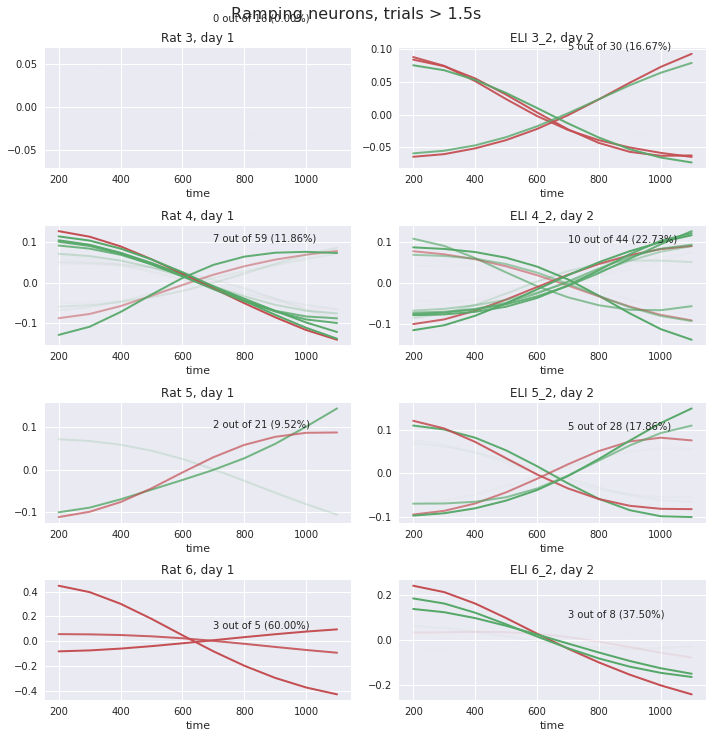

In [425]:
plt.figure(figsize=(10,10))
THRESHOLD = .01
alpha = lambda p: (((1-p)**10)**10)
for label in SHORTCUTS['groups']['EZ']:
    ax = plt.subplot(4, 2, (int(label[4]))*2-5 + ('_2' in label))
    data = io.load(label, 'huge_smoothed')
    data = select(data, _min_duration=1.5)
    quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    fr = data.cropped.reset_index().drop('trial',axis=1).groupby('unit').apply(lambda df: np.vstack(df.drop('unit',axis=1).values))
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='cropped')

    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)

    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        act = Z[unit].unstack('time').mean()
        act.plot(alpha=alpha(p), color='r' if quality[unit]==0 else'g', linewidth=2, ax=ax)
    plt.text(700,.1, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('{}, day 2'.format(label))
    else:
        plt.title('Rat {}, day 1'.format(label[4]))


plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 1.5s', y=1.02, fontsize=16)

Text(0.5,1.02,'Ramping neurons, trials > 1.5s and < 2.5s')

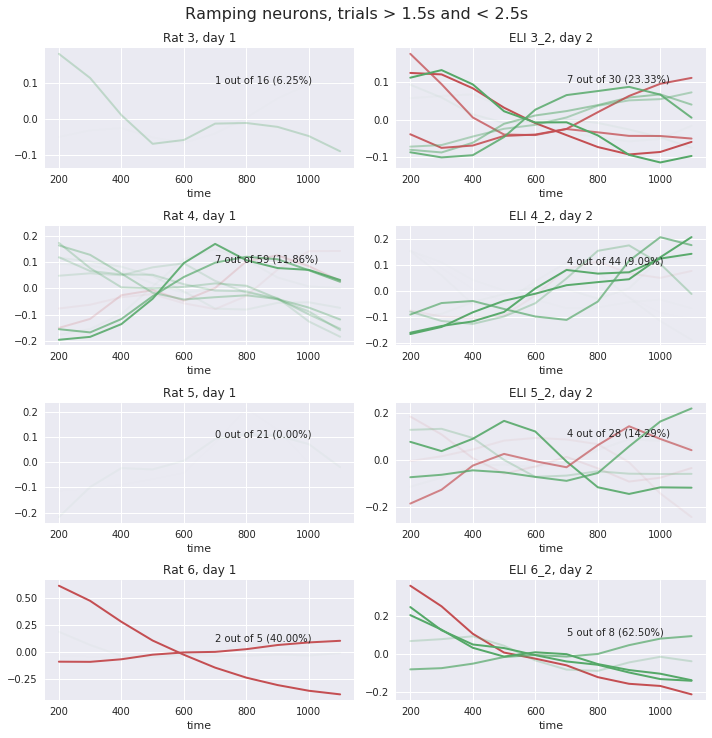

In [419]:
plt.figure(figsize=(10,10))
THRESHOLD = .01
for label in SHORTCUTS['groups']['EZ']:
    ax = plt.subplot(4, 2, (int(label[4]))*2-5 + ('_2' in label))
    data = io.load(label, 'wide_smoothed')
    data = select(data, _min_duration=1.5, _max_duration=2.5)
    quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    fr = data.cropped.reset_index().drop('trial',axis=1).groupby('unit').apply(lambda df: np.vstack(df.drop('unit',axis=1).values))
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='cropped')

    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)

    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        act = Z[unit].unstack('time').mean()
        act.plot(alpha=alpha(p), color='r' if quality[unit]==0 else'g', linewidth=2, ax=ax)
    plt.text(700,.1, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('{}, day 2'.format(label))
    else:
        plt.title('Rat {}, day 1'.format(label[4]))


plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 1.5s and < 2.5s', y=1.02, fontsize=16)

Text(0.5,1.02,'Ramping neurons, trials > 2.5s')

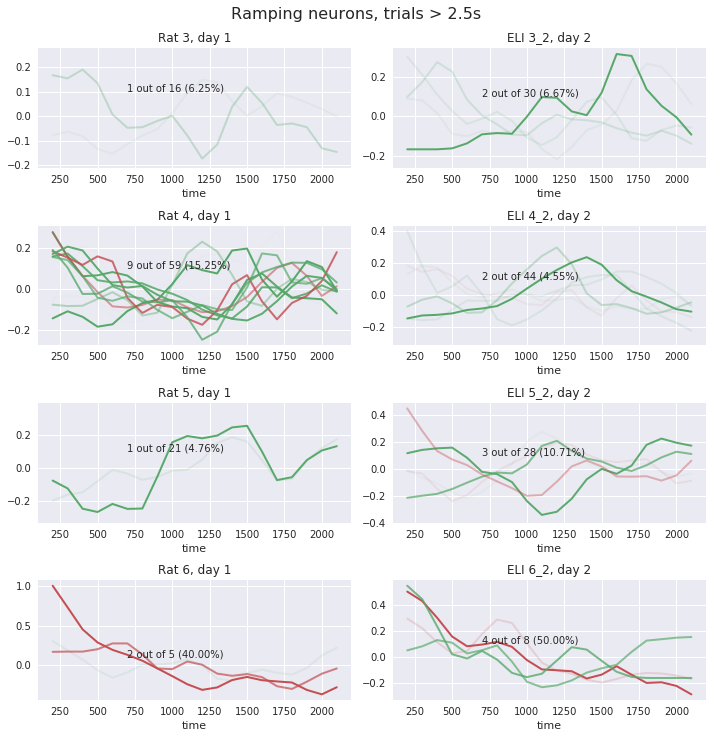

In [420]:
plt.figure(figsize=(10,10))
THRESHOLD = .01
for label in SHORTCUTS['groups']['EZ']:
    ax = plt.subplot(4, 2, (int(label[4]))*2-5 + ('_2' in label))
    data = io.load(label, 'wide_smoothed')
    data = select(data, _min_duration=2.5)
    quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    fr = data.cropped.reset_index().drop('trial',axis=1).groupby('unit').apply(lambda df: np.vstack(df.drop('unit',axis=1).values))
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='cropped')

    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)

    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        act = Z[unit].unstack('time').mean()
        act.plot(alpha=alpha(p), color='r' if quality[unit]==0 else'g', linewidth=2, ax=ax)
    plt.text(700,.1, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('{}, day 2'.format(label))
    else:
        plt.title('Rat {}, day 1'.format(label[4]))
        
plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 2.5s', y=1.02, fontsize=16)